# Assignment- EDA and Preprocessing

**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [3]:
df = pd.read_csv('Employee.csv')

### Data Exploration

In [32]:
#Find the first 5 rows of the data table
df.head()

,Company,Age,Salary,City,Country,encoded_place,Gender_1,age
0,TCS,0.370370,0.476518,Chennai,India,2,False,0.370370
1,Infosys,0.555556,0.476518,Mumbai,India,6,False,0.555556
2,TCS,0.648148,0.137817,Calcutta,India,1,False,0.648148
3,Infosys,0.740741,0.217480,Delhi,India,4,False,0.740741
4,TCS,0.425926,0.331285,Mumbai,India,6,False,0.425926


In [13]:
#Get the basic information about all the coloumns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [14]:
#Check basic statisticss of the data
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [8]:
df.shape

(148, 6)

In [11]:
# Get the unique values and their length for each feature
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")
    print(f"Length of unique values in {column}: {len(df[column].unique())}")
    print("\n")

Unique values in Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Length of unique values in Company: 7


Unique values in Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length of unique values in Age: 30


Unique values in Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Length of unique values in Salary: 41


Unique values in Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Length of unique values in Place: 12


Unique values in Country: ['India']
Length of unique values in Country: 1


Unique values in Gender: [0 1]
Length of unique values in Gender: 2




#### Statistical analysis and renaming of the coloumns

In [17]:
df.rename(columns={'Place': 'City'}, inplace=True)

# Check for statistical analysis
print(df.describe())

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


### Data Cleaning

#### Check missing for values and handle them

In [18]:
print(df.isnull().sum())

Company     8
Age        18
Salary     24
City       14
Country     0
Gender      0
dtype: int64


There are many null values in the dataset, which needs to be filled

In [ ]:
df.dropna(subset=['Company'], inplace=True) # Dropping rows with missing values in the company coloumn
df['Age'].fillna(df['Age'].mean(), inplace=True) #Replacing null values with mean
df['Salary'].fillna(df['Salary'].mean(), inplace=True) #Replacing null values with mean
df['City'].fillna(df['Salary'].mode(), inplace=True)

Ensure that the null values are removed

In [21]:
print(df.isnull().sum())

Company     0
Age         0
Salary      0
City       13
Country     0
Gender      0
dtype: int64


#### Remove Duplicates

In [33]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

### Data Analysis

#### Filter the data with age >40 and salary<5000

In [23]:
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print(filtered_data)

     Company   Age  Salary       City Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


#### Plot the chart with age and salary

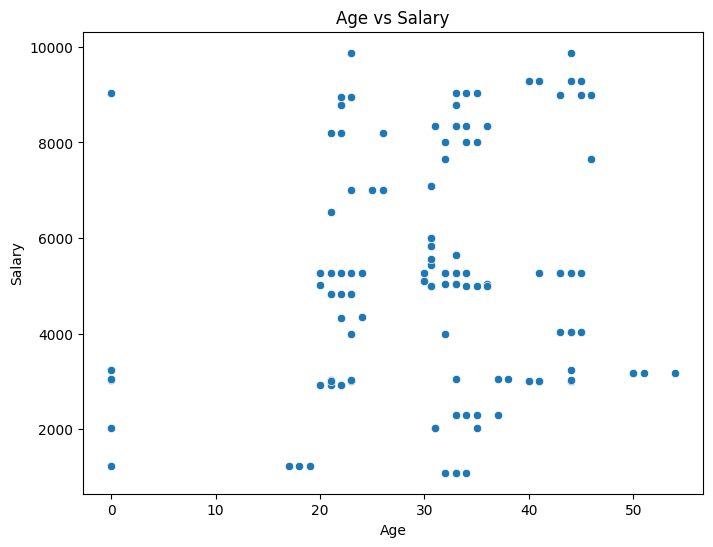

In [25]:
# Plotting Age vs Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

#### Count the number of people from each place and represent it visually

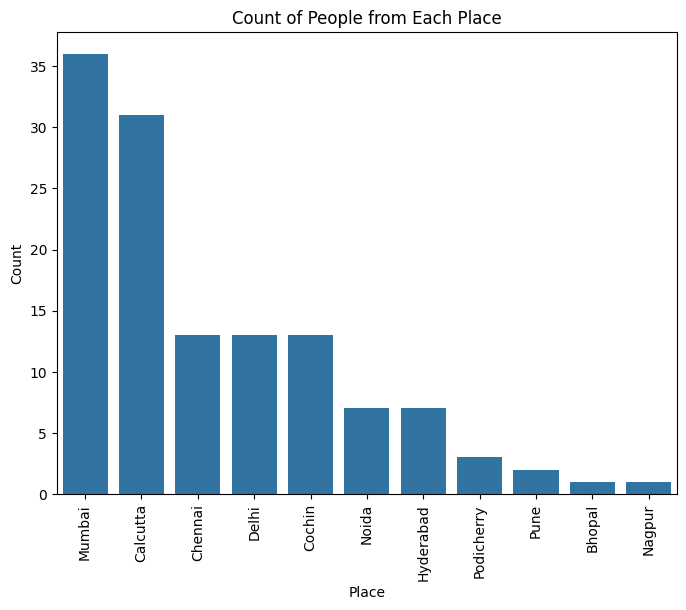

In [26]:
place_count = df['City'].value_counts()

# Plotting the count of people from each place
plt.figure(figsize=(8, 6))
sns.barplot(x=place_count.index, y=place_count.values)
plt.title('Count of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


### Data Encoding

#### Convert categorical variables into numerical representations using techniques like One-Hot Encoding and Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
label_encoder = LabelEncoder()
df['encoded_place'] = label_encoder.fit_transform(df['City'])

# One-Hot Encoding
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [28]:
df

,Company,Age,Salary,City,Country,encoded_place,Gender_1
0,TCS,20.0,5276.159664,Chennai,India,2,False
1,Infosys,30.0,5276.159664,Mumbai,India,6,False
2,TCS,35.0,2300.000000,Calcutta,India,1,False
3,Infosys,40.0,3000.000000,Delhi,India,4,False
4,TCS,23.0,4000.000000,Mumbai,India,6,False
...,...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1,True
144,Infosys,22.0,8787.000000,Calcutta,India,1,True
145,Infosys,44.0,4034.000000,Delhi,India,4,True
146,TCS,33.0,5034.000000,Mumbai,India,6,True


### Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard Scaler (Standardization)
scaler = StandardScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])

# Min-Max Scaler (Normalization)
min_max_scaler = MinMaxScaler()
df[['Age', 'Salary']] = min_max_scaler.fit_transform(df[['Age', 'Salary']])


In [31]:
df

,Company,Age,Salary,City,Country,encoded_place,Gender_1,age
0,TCS,0.370370,0.476518,Chennai,India,2,False,0.370370
1,Infosys,0.555556,0.476518,Mumbai,India,6,False,0.555556
2,TCS,0.648148,0.137817,Calcutta,India,1,False,0.648148
3,Infosys,0.740741,0.217480,Delhi,India,4,False,0.740741
4,TCS,0.425926,0.331285,Mumbai,India,6,False,0.425926
...,...,...,...,...,...,...,...,...
143,TCS,0.611111,0.903039,Calcutta,India,1,True,0.611111
144,Infosys,0.407407,0.876067,Calcutta,India,1,True,0.407407
145,Infosys,0.814815,0.335154,Delhi,India,4,True,0.814815
146,TCS,0.611111,0.448959,Mumbai,India,6,True,0.611111
